# Quick Select

<span style="color:red">Quick Sort was named as one of the most important algorithm of the 20th century. Invented by **Sir Charles Antony Richard Hoare** in 1961. Received turning award in 1980 for this discovery. </span>

Quick Select is a selection problem also solved by Quick sort.


## Problem
Given an array of N elements, find the kth largest.  
Example: Min (k = 0), max (k = N-1), median (k = N/2)

## Applications for such problems
- Order statistics
- Find the "Top k"

## What options are available
- Just sort entire input using QuickSort / MergeSort and then select the required element -  Time required O(NlogN)
- If k is small, example 1, 2 or 3 
  - k = 1 - Select the smallest or largest element. Just pass through the input once and find the smallest or the largest element - Time required O(N)
  - K = 2 - Find the 2nd largest element - Perform 2 passes to get the 2nd largest element or have 2 variables to keep track of largest and second largest in 1 pass - Time required O(N)
  
From these observations, it clear that we need a selection algorithm which runs in linear time O(N)  
But the question is, is there a linear time algorithm that works for every K? Or is selection as hard as sorting

## Solution - Quick Select
In the Hoare's original paper in 1961, Hoare gave solution to this select problem based on partitioning. Its a version of Quick Sort in a way.


## Idea
We do partitioning so that we get entry a[j] in an array where no element to the left of j are larger than a[j] and no element to the right of j are smaller than a[j].

Now just go in one sub array or the other depending on whether the position we are looking for is smaller than j or larger than j.  
Example: if we are looking for 2nd smallest element (k = 2) and j = 5 then only check for the left sub array and ignore the right sub array as the 2nd smallest element can not be the right of j.

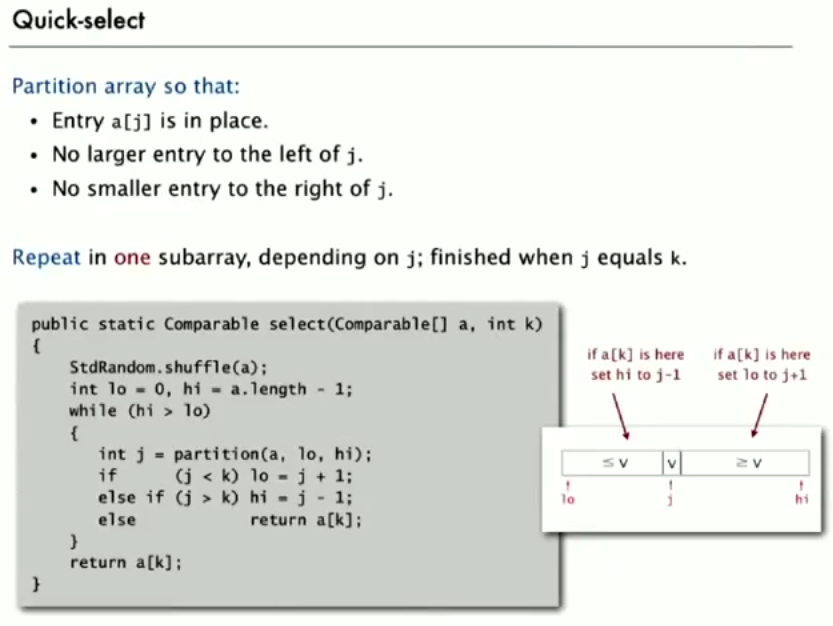


In [3]:
import java.util.*;

public class QuickSort {
    
    public static int select (int[] a, int k){
        //Step1 is to perform the shuffle
        Collections.shuffle(Arrays.asList(a));
        
        int lo = 0, hi = a.length - 1;
        while(hi > lo) {
            int j = partition(a, lo, hi);
            if(j < k)      lo = j + 1;
            else if(j > k) hi = j - 1;
            else           return a[k];
        }
        
        return a[k];
    }
    
    /*
    public static void sort (int[] a){
        Collections.shuffle(Arrays.asList(a));
        sort(a, 0, a.length-1); 
    }
    
    private static void sort(int[] a, int lo, int hi) {
        if (hi <= lo) return;
        int j = partition(a, lo, hi);
        sort(a, lo, j-1);
        sort(a, j+1, hi);
    }
    */
    
    private static int partition(int[] a, int lo, int hi) {
        int i = lo, j = hi+1;
        
        while(true) {
            /* find the item on the left to swap. 
            As long as a[i] is smaller than a[lo] move to the next element */
            while (a[++i] < a[lo]) 
                if(i == hi) break;
            
            /* find the item on the right to swap. 
            As long as a[j] is greater than a[lo] move to the previous element */
            while (a[--j] > a[lo]) 
                if(j == lo) break;
            
            /*If i and j crosses then break. 
            By this time, all elements to the left if i are smaller than a[lo]
            and all elements by right of j are greater than a[lo] */
            if(i >= j) break;
            
            /*if i and j have not passed each other, they point to the elements which
            are out of order and needs to be swapped. */
            exchange (a, i, j);
        }
        
        /*At this point j points to the divide between elements smaller and larger than a[lo]
        Therefore exchange a[lo] with a[j]*/
        exchange (a, lo, j);
        return j;
    }
    
    private static void exchange (int[] a, int i, int j) {
        int temp = a[i];
        a[i] = a[j];
        a[j] = temp;
    }
}

com.twosigma.beaker.javash.bkre12ebc5f.QuickSort

In [6]:
int[] a = {5,8,2,4,7,9,1,0,3,6};
System.out.println("2nd smallest element: " + 
                   QuickSort.select(a, 1)); // 2nd smallest sits at position 1

2nd smallest element: 1


null